# Project/Research : Stage 1

**Objective :  1. Convert audio/Speech to text**



In [ ]:
#References : 
#https://towardsdatascience.com/easy-speech-to-text-with-python-3df0d973b426
#https://www.thepythoncode.com/article/using-speech-recognition-to-convert-speech-to-text-python

In [ ]:
#Installing the necessary libraries wherever required

In [ ]:
!pip install SpeechRecognition

**Library for performing speech recognition, with support for several engines and APIs, online and offline.**

https://pypi.org/project/SpeechRecognition/

In [ ]:
#Sample 1

#Used Liam Nesson voice from the movie taken

#https://www.youtube.com/watch?v=jZOywn1qArI&t=51s

In [ ]:
#Reading the wav File

In [ ]:
import IPython
IPython.display.Audio('/content/sample_data/Taken.wav')

In [ ]:
#Reading the wav File

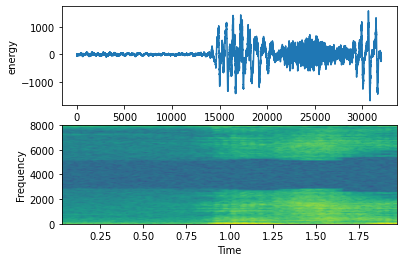

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt

signal_wave = wave.open('/content/sample_data/Taken.wav', 'r')
sample_rate = 16000
sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)
sig = sig[:]
#plt.figure(1)

plot_a = plt.subplot(211)
plot_a.plot(sig)
plot_a.set_xlabel('sample rate * time')
plot_a.set_ylabel('energy')

plot_b = plt.subplot(212)
plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
plot_b.set_xlabel('Time')
plot_b.set_ylabel('Frequency')

plt.show()

In [ ]:
#import library
import speech_recognition as sr

# Initialize recognizer class (for recognizing the speech)
r = sr.Recognizer()

# Reading Audio file as source
# listening the audio file and store in audio_text variable

with sr.AudioFile('/content/sample_data/Taken.wav') as source:
    
    audio_text = r.listen(source)
    
# recoginize_() method will throw a request error if the API is unreachable, hence using exception handling
    try:
        
        # using google speech recognition
        text = r.recognize_google(audio_text)
        print('Converting audio transcripts into text ...')
        print(' ')
        print(text)
     
    except:
         print('Sorry.. run again...')

Converting audio transcripts into text ...
 
if you are looking for ransom I can tell you I don't have money


In [ ]:
#Sample 2

#Used Liam Nesson voice from the movie taken

#https://www.youtube.com/watch?v=jZOywn1qArI&t=51s

#Large lenght clip

In [ ]:
#Reading the wav File

In [ ]:
import IPython
IPython.display.Audio('/content/sample_data/Taken1.wav')

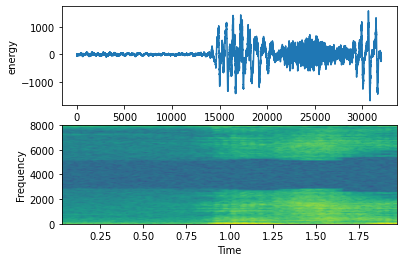

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt

signal_wave = wave.open('/content/sample_data/Taken1.wav', 'r')
sample_rate = 16000
sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)
sig = sig[:]
#plt.figure(1)

plot_a = plt.subplot(211)
plot_a.plot(sig)
plot_a.set_xlabel('sample rate * time')
plot_a.set_ylabel('energy')

plot_b = plt.subplot(212)
plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
plot_b.set_xlabel('Time')
plot_b.set_ylabel('Frequency')

plt.show()

In [ ]:
#import library
import speech_recognition as sr

# Initialize recognizer class (for recognizing the speech)
r = sr.Recognizer()

# Reading Audio file as source
# listening the audio file and store in audio_text variable

with sr.AudioFile('/content/sample_data/Taken1.wav') as source:
    
    audio_text = r.listen(source)
    
# recoginize_() method will throw a request error if the API is unreachable, hence using exception handling
    try:
        
        # using google speech recognition
        text = r.recognize_google(audio_text)
        print('Converting audio transcripts into text ...')
        print(' ')
        print(text)
     
    except:
         print('Sorry.. run again...')

Converting audio transcripts into text ...
 
if you are looking for ransom I can tell you I don't have money but what I do have


In [ ]:
#It doesnt work for Long voice Speech or audio

#For longer audio

In [ ]:
#for longer audio files

In [ ]:
#Sample 3 (same sample)

#Used Liam Nesson voice from the movie taken

#https://www.youtube.com/watch?v=jZOywn1qArI&t=51s

#Large lenght clip

In [ ]:
#https://pypi.org/project/thinkx/
!pip install pydub

In [ ]:
# importing libraries 
import speech_recognition as sr 
import os 
from pydub import AudioSegment
from pydub.silence import split_on_silence

# create a speech recognition object
r = sr.Recognizer()

# a function that splits the audio file into chunks
# and applies speech recognition
def get_large_audio_transcription(path):
    """
    Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks
    """
    # open the audio file using pydub
    sound = AudioSegment.from_wav(path)  
    # split audio sound where silence is 700 miliseconds or more and get chunks
    chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
        min_silence_len = 600,
        # adjust this per requirement
        silence_thresh = sound.dBFS-14,
        # keep the silence for 1 second, adjustable as well
        keep_silence=200,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    global whole_text#declared a global variable to be used outside the fucntion as well
    whole_text = ""
    # process each chunk 
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # recognize the chunk
        with sr.AudioFile(chunk_filename) as source:
            audio_listened = r.record(source)
            # try converting it to text
            try:
                text = r.recognize_google(audio_listened)
            except sr.UnknownValueError as e:
                print("Error:", str(e))
            else:
                text = f"{text.capitalize()}. "
                print(chunk_filename, ":", text)
                whole_text += text
    # return the text for all chunks detected
    return whole_text

In [ ]:
path1 = "/content/sample_data/Taken1.wav"
print("\nFull text:", get_large_audio_transcription(path1))

audio-chunks/chunk1.wav : If you are looking for ransom. 
audio-chunks/chunk2.wav : I can tell you i don't have money. 
audio-chunks/chunk3.wav : But what i do have. 
audio-chunks/chunk4.wav : Are a very particular set of skills skills i have acquired a very long career skills that make me a nightmare for people like you if you let my daughter go now that'll be the end of it i will not look for you i will not pursue you but if you don't. 
audio-chunks/chunk5.wav : I will look for you i will find you and i will kill you. 

Full text: If you are looking for ransom. I can tell you i don't have money. But what i do have. Are a very particular set of skills skills i have acquired a very long career skills that make me a nightmare for people like you if you let my daughter go now that'll be the end of it i will not look for you i will not pursue you but if you don't. I will look for you i will find you and i will kill you. 


In [ ]:
whole_text

"If you are looking for ransom. I can tell you i don't have money. But what i do have. Are a very particular set of skills skills i have acquired a very long career skills that make me a nightmare for people like you if you let my daughter go now that'll be the end of it i will not look for you i will not pursue you but if you don't. I will look for you i will find you and i will kill you. "

In [ ]:
#Sample 4 

#Motivational video

#Large lenght clip

In [ ]:
path2 = "/content/Motivation1.wav"
print("\nFull text:", get_large_audio_transcription(path2))

audio-chunks/chunk1.wav : Most people only pay attention to the final product will be successful. 
audio-chunks/chunk2.wav : If you think like i can never be like them or they got lucky. 
audio-chunks/chunk3.wav : But what most people don't see. 
audio-chunks/chunk4.wav : Is what they had to overcome. 
audio-chunks/chunk5.wav : All the struggles. 
audio-chunks/chunk6.wav : Ejection. 
Error: 
audio-chunks/chunk8.wav : The betrayals the rumors to criticism. 
audio-chunks/chunk9.wav : Empty bank account. 
audio-chunks/chunk10.wav : Does lonely nights trying to make a visionary allen. 
audio-chunks/chunk11.wav : Don't difference between the one who quit and the one who didn't quit is that the one who made it showed up everyday. 
audio-chunks/chunk12.wav : They work hard everyday. 
Error: 
audio-chunks/chunk14.wav : The improved everyday. 
audio-chunks/chunk15.wav : Did oldest even though the thought of quitting everyday. 
audio-chunks/chunk16.wav : And eventually. 
audio-chunks/chunk17.wav

In [ ]:
whole_text

"Most people only pay attention to the final product will be successful. If you think like i can never be like them or they got lucky. But what most people don't see. Is what they had to overcome. All the struggles. Ejection. The betrayals the rumors to criticism. Empty bank account. Does lonely nights trying to make a visionary allen. Don't difference between the one who quit and the one who didn't quit is that the one who made it showed up everyday. They work hard everyday. The improved everyday. Did oldest even though the thought of quitting everyday. And eventually. They became who they are today. "

In [ ]:
#---------------------------------------------End Objective 1---------------------------------------------------------------------#

**Objective :  2. Language Detection and conversion to Different Languages**

In [ ]:
!pip install langdetect

In [ ]:
#Language Detection

In [ ]:
from langdetect import detect

sentence = "Bengaluru is the capital of India's southern Karnataka state. The center of India's high-tech industry, the city is also known for its parks and nightlife."

print(detect(sentence))

en


In [ ]:
sentence = "बेंगळुरू ही भारताच्या दक्षिण कर्नाटक राज्याची राजधानी आहे. भारताच्या उच्च-तंत्रज्ञान उद्योगाचे केंद्र, हे शहर उद्यान आणि नाइटलाइफसाठी देखील ओळखले जाते."

print(detect(sentence))

mr


In [ ]:
#The method detects the text provided is in the English language (‘en’) and marthi ('mr')

In [ ]:
#Language Translation 

In [ ]:
!pip install google_trans_new

In [ ]:
#There are some bugs in the original library!!!!!!!!

In [ ]:
pip show google_trans_new

Name: google-trans-new
Version: 1.1.9
Summary: A free and unlimited python tools for google translate api.
Home-page: https://github.com/lushan88a/google_trans_new
Author: LuShan
Author-email: 188301710@qq.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: 


In [ ]:
#list of languages we can conver to

#{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 
#'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 
#'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 
#'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian',
# 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 
#'haw': 'hawaiian', 'iw': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 
#'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 
#'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'latin', 'lv': 'latvian', 'lt': 'lithuanian', 'lb': 'luxembourgish', 
#'mk': 'macedonian', 'mg': 'malagasy', 'ms': 'malay', 'ml': 'malayalam', 'mt': 'maltese', 'mi': 'maori', 'mr': 'marathi', 'mn': 'mongolian', 
#'my': 'myanmar (burmese)', 'ne': 'nepali', 'no': 'norwegian', 'ps': 'pashto', 'fa': 'persian', 'pl': 'polish', 'pt': 'portuguese', 
#'pa': 'punjabi', 'ro': 'romanian', 'ru': 'russian', 'sm': 'samoan', 'gd': 'scots gaelic', 'sr': 'serbian', 'st': 'sesotho', 
#'sn': 'shona', 'sd': 'sindhi', 'si': 'sinhala', 'sk': 'slovak', 'sl': 'slovenian', 'so': 'somali', 'es': 'spanish', 'su': 'sundanese', 
#'sw': 'swahili', 'sv': 'swedish', 'tg': 'tajik', 'ta': 'tamil', 'te': 'telugu', 'th': 'thai', 'tr': 'turkish', 'uk': 'ukrainian', 
#'ur': 'urdu', 'uz': 'uzbek', 'vi': 'vietnamese', 'cy': 'welsh', 'xh': 'xhosa', 'yi': 'yiddish', 'yo': 'yoruba', 
#'zu': 'zulu', 'fil': 'Filipino', 'he': 'Hebrew'}

In [ ]:
#Hindi

In [ ]:
from google_trans_new import google_translator

translator = google_translator()

sentence1 = 'India, officially the Republic of India, is a country in South Asia. It is the seventh-largest country by area, the second-most populous country, and the most populous democracy in the world.'
translate_text = translator.translate(sentence1,lang_tgt='hi') 

print(translate_text)

भारत, आधिकारिक तौर पर भारत गणराज्य, दक्षिण एशिया में एक देश है। यह क्षेत्र, दूसरा सबसे अधिक आबादी वाला देश, और दुनिया में सबसे अधिक आबादी वाला लोकतंत्र द्वारा सातवां सबसे बड़ा देश है। 


In [ ]:
#Kannada

In [ ]:
from google_trans_new import google_translator

translator = google_translator()

sentence1 = 'India, officially the Republic of India, is a country in South Asia. It is the seventh-largest country by area, the second-most populous country, and the most populous democracy in the world.'
translate_text = translator.translate(sentence1,lang_tgt='kn') 

print(translate_text)

ಭಾರತ, ಅಧಿಕೃತವಾಗಿ ರಿಪಬ್ಲಿಕ್ ಆಫ್ ಇಂಡಿಯಾ, ದಕ್ಷಿಣ ಏಷ್ಯಾದಲ್ಲಿ ಒಂದು ದೇಶ. ಇದು ಏಕದಳ, ಎರಡನೇ ಅತಿ ಹೆಚ್ಚು ಜನಸಂಖ್ಯೆ ಹೊಂದಿರುವ ದೇಶ, ಮತ್ತು ವಿಶ್ವದ ಅತ್ಯಂತ ಜನನಿಬಿಡ ಪ್ರಜಾಪ್ರಭುತ್ವವನ್ನು ಹೊಂದಿದೆ. 


In [ ]:
#Telgu

In [ ]:
from google_trans_new import google_translator

translator = google_translator()

sentence1 = 'India, officially the Republic of India, is a country in South Asia. It is the seventh-largest country by area, the second-most populous country, and the most populous democracy in the world.'
translate_text = translator.translate(sentence1,lang_tgt='te') 

print(translate_text)

భారతదేశం, అధికారికంగా రిపబ్లిక్ ఆఫ్ ఇండియా, దక్షిణ ఆసియాలో ఒక దేశం. ఇది ఏడవ అతిపెద్ద దేశం, రెండవ అత్యంత జనాభా కలిగిన దేశం, మరియు ప్రపంచంలో అత్యంత జనాభా కలిగిన ప్రజాస్వామ్యం. 


In [ ]:
#--------------------------------------------End Objective 2--------------------------------#

**Objective :  3. Converting Text to Target language and near Human Voice**

In [ ]:
##Language detection and Translation 

In [ ]:
!pip install gTTS

In [ ]:
#gTTS (Google Text-to-Speech), a Python library and CLI tool to interface with Google Translate text-to-speech API

In [ ]:
from langdetect import detect
from google_trans_new import google_translator  

#simple function to detect and translate text 
def detect_and_translate(text,target_lang):
    
    result_lang = detect(text)
    print(result_lang)
    if result_lang == target_lang:
        return text 
    
    else:
        translator = google_translator()
        translate_text = translator.translate(text,lang_src=result_lang,lang_tgt=target_lang)
        return translate_text

In [ ]:
#The orignal English

In [ ]:
sentence4 = "The Republic of India is a country in South Asia. It is the seventh-largest country by area, the second-most populous country, and the most populous democracy in the world. Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land borders with Pakistan to the west"
Text4=detect_and_translate(sentence4,target_lang='en')
print(Text4)

en
The Republic of India is a country in South Asia. It is the seventh-largest country by area, the second-most populous country, and the most populous democracy in the world. Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land borders with Pakistan to the west


In [ ]:
# Import the required module for text 
# to speech conversion
from gtts import gTTS


# This module is imported so that we can 
# play the converted audio
from IPython.display import Audio
  #English (India)
tts = gTTS(text=Text4, lang='en', tld='co.in',slow=False)
tts.save('sample1.wav')
sound_file='sample1.wav'
Audio(sound_file,autoplay=True)

In [ ]:
#converting the text to hindi

In [ ]:
sentence1 = "The Republic of India is a country in South Asia. It is the seventh-largest country by area, the second-most populous country, and the most populous democracy in the world. Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land borders with Pakistan to the west"
Text1=detect_and_translate(sentence1,target_lang='hi')
print(Text1)

en
भारत गणराज्य दक्षिण एशिया में एक देश है। यह क्षेत्र, दूसरा सबसे अधिक आबादी वाला देश, और दुनिया में सबसे अधिक आबादी वाला लोकतंत्र द्वारा सातवां सबसे बड़ा देश है। दक्षिण में हिंद महासागर, दक्षिणपश्चिम पर अरब सागर, और दक्षिण पूर्व में बंगाल की खाड़ी से घिरा हुआ, यह पाकिस्तान के साथ पश्चिम में भूमि सीमाओं को साझा करता है 


In [ ]:
# Import the required module for text 
# to speech conversion
from gtts import gTTS


# This module is imported so that we can 
# play the converted audio
from IPython.display import Audio
  #English (India)
tts = gTTS(text=Text1, lang='en', tld='co.in',slow=False)
tts.save('sample1.wav')
sound_file='sample1.wav'
Audio(sound_file,autoplay=True)

In [ ]:
#converting the text to Kannada

In [ ]:
sentence2 = "The Republic of India is a country in South Asia. It is the seventh largest country by area, the second-most populous country, and the most populous democracy in the world. Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land borders with Pakistan to the west"
Text2=detect_and_translate(sentence2,target_lang='kn')
print(Text2)

en
ಭಾರತದ ಗಣರಾಜ್ಯವು ದಕ್ಷಿಣ ಏಷ್ಯಾದಲ್ಲಿ ಒಂದು ದೇಶವಾಗಿದೆ. ಇದು ಏರಿಯಾದ ದೊಡ್ಡ ದೇಶವಾಗಿದ್ದು, ಎರಡನೇ ಅತಿ ಹೆಚ್ಚು ಜನನಿಬಿಡ ದೇಶ, ಮತ್ತು ವಿಶ್ವದ ಅತ್ಯಂತ ಜನನಿಬಿಡ ಪ್ರಜಾಪ್ರಭುತ್ವ. ದಕ್ಷಿಣದಲ್ಲಿ ಹಿಂದೂ ಮಹಾಸಾಗರ, ನೈಋತ್ಯದಲ್ಲಿ ಅರೇಬಿಯನ್ ಸಮುದ್ರ, ಮತ್ತು ಆಗ್ನೇಯದಲ್ಲಿ ಬಂಗಾಳದ ಕೊಲ್ಲಿ, ಇದು ಪಶ್ಚಿಮಕ್ಕೆ ಪಾಕಿಸ್ತಾನದೊಂದಿಗೆ ಭೂಮಿ ಗಡಿಗಳನ್ನು ಹಂಚಿಕೊಳ್ಳುತ್ತದೆ 


In [ ]:
# Import the required module for text 
# to speech conversion
from gtts import gTTS


# This module is imported so that we can 
# play the converted audio
from IPython.display import Audio
  #English (India)
tts = gTTS(text=Text2, lang='en', tld='co.in',slow=False)
tts.save('sample1.wav')
sound_file='sample1.wav'
Audio(sound_file,autoplay=True)

In [ ]:
#converting the text to telugu

In [ ]:
sentence3 = "The Republic of India is a country in South Asia. It is the seventh-largest country by area, the second-most populous country, and the most populous democracy in the world. Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land borders with Pakistan to the west"
Text3=detect_and_translate(sentence3,target_lang='te')
print(Text3)

en
భారతదేశం యొక్క రిపబ్లిక్ దక్షిణ ఆసియాలో ఒక దేశం. ఇది ఏడవ అతిపెద్ద దేశం, రెండవ అత్యంత జనాభా కలిగిన దేశం, మరియు ప్రపంచంలో అత్యంత జనాభా కలిగిన ప్రజాస్వామ్యం. దక్షిణాన హిందూ మహాసముద్రం, నైరుతి మీద అరేబియా సముద్రం, మరియు ఆగ్నేయలో బెంగాల్ బే, ఇది పాకిస్థాన్తో పశ్చిమాన భూమి సరిహద్దులను పంచుకుంటుంది 


In [ ]:
# Import the required module for text 
# to speech conversion
from gtts import gTTS


# This module is imported so that we can 
# play the converted audio
from IPython.display import Audio
  #English (India)
tts = gTTS(text=Text3, lang='en', tld='co.in',slow=False)
tts.save('sample1.wav')
sound_file='sample1.wav'
Audio(sound_file,autoplay=True)

In [ ]:
#-------------------------------End of Objective 3------------------------------------------------------------------#